# Welter



Monday, January 4, 2016

## An experiment to add starspot models

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

In [3]:
import pandas as pd

In [4]:
sns.set_context('paper', font_scale=1.6)
sns.set_style('ticks')

In [5]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_ESPaDOnS_run01_last10kMCMC.csv')
sf_dat.rename(columns={"m_val_x":"m_val"}, inplace=True)
del sf_dat['m_val_y']

In [6]:
sf_dat.head()

m_val  number   wl_center     wl_end   wl_start     Teff_05p     Teff_50p  \
0      0       0  5180.62500  5199.9292  5161.3208  3671.597583  3734.931152   
1      1       1  5231.25700  5262.5311  5199.9829  3910.707983  3991.772217   
2      2       2  5294.98655  5327.4005  5262.5726  3850.192407  3990.523193   
3      3       3  5360.99580  5394.5496  5327.4420  3846.459961  3923.694824   
4      4       4  5429.35055  5464.0826  5394.6185  3727.496973  3812.548828   

      Teff_95p  logg_05p  logg_50p  ...      SA_05p    SA_50p    SA_95p  \
0  3918.759131  3.757152  3.929592  ...    4.130559  4.424212  4.735918   
1  4062.312549  3.531365  3.655367  ...    3.515317  3.773452  4.024213   
2  4186.905322  3.815876  3.936076  ...    3.121204  3.315826  3.529300   
3  3995.909888  3.585957  3.762359  ...    2.058792  2.182574  2.324363   
4  3867.507104  3.572361  3.817147  ...    2.110130  2.260994  2.406161   

     LA_05p    LA_50p    LA_95p     ll_05p     ll_50p     ll_95p  m_int  
0 -1.030014 -0.915195 -0.820424  56.789884  72.114952  82.728920      0  
1 -1.249743 -1.176541 -1.078180  35.295181  41.962921  52.413920      1  
2 -1.314615 -1.223884 -1.141970  36.250294  46.100685  56.028513      2  
3 -1.328933 -1.267863 -1.195140  37.950161  43.088070  49.906529      3  
4 -1.200368 -1.147594 -1.093094  44.042196  48.723873  53.670507      4  

[5 rows x 42 columns]

In [171]:
sf_dat

m_val  number   wl_center     wl_end   wl_start     Teff_05p     Teff_50p  \
0       0       0  5180.62500  5199.9292  5161.3208  3671.597583  3734.931152   
1       1       1  5231.25700  5262.5311  5199.9829  3910.707983  3991.772217   
2       2       2  5294.98655  5327.4005  5262.5726  3850.192407  3990.523193   
3       3       3  5360.99580  5394.5496  5327.4420  3846.459961  3923.694824   
4       4       4  5429.35055  5464.0826  5394.6185  3727.496973  3812.548828   
5       5       5  5500.15715  5536.1810  5464.1333  4103.650000  4165.299805   
6       6       6  5573.65050  5611.0803  5536.2207  4090.931470  4129.071289   
7       7       7  5649.92550  5688.7048  5611.1462  4004.623706  4057.353516   
8       8       8  5729.08110  5769.3994  5688.7628  3993.828540  4038.716309   
9       9       9  5811.36870  5853.2635  5769.4739  4147.689258  4212.306641   
10     10      10  5896.92415  5940.5292  5853.3191  4072.996802  4119.526855   
11     11      11  5986.02415  6031.4532  5940.5951  4028.569458  4091.771973   
12     12      12  6078.84830  6126.1774  6031.5192  4065.557983  4108.551758   
13     13      13  6175.60730  6224.9695  6126.2451  3917.161816  3941.800781   
14     14      14  6276.59180  6328.1580  6225.0256  3969.390601  4012.347412   
15     15      15  6382.04830  6435.8752  6328.2214  4197.656543  4238.287109   
16     16      16  6492.29645  6548.6694  6435.9235  3804.825098  3880.873291   
17     17      17  6607.72795  6666.7419  6548.7140  3803.800781  3874.089600   
18     18      18  6728.66730  6790.5310  6666.8036  4022.149658  4054.674561   
19     19      19  6855.48915  6920.3741  6790.6042          NaN          NaN   
20     20      20  6988.65145  7056.8805  6920.4224  3887.649048  3907.938721   
21     21      21  7128.69475  7200.4388  7056.9507  3889.885107  3910.039795   
22     22      22  7276.11175  7351.7126  7200.5109  3863.020630  3878.833740   
23     23      23  7431.47340  7511.1786  7351.7682  4019.157739  4085.167480   
24     24      24  7595.52125  7679.8053  7511.2372          NaN          NaN   
25     25      25  7768.94530  7858.0176  7679.8730          NaN          NaN   
26     26      26  7954.31825  8050.5725  7858.0640  3828.236572  3852.798096   
27     27      27  8153.12650  8255.6317  8050.6213          NaN          NaN   
28     28      28  8364.67985  8473.6639  8255.6958          NaN          NaN   
29     29      29  8589.87455  8706.0406  8473.7085  3458.553662  3504.736084   
30     30      30  8830.04120  8953.9783  8706.1041  3792.400464  3821.734619   
31     31      31  9086.52770  9219.0149  8954.0405          NaN          NaN   
32     32      32  9361.03245  9502.9816  9219.0833          NaN          NaN   
33     33      33  9655.50905  9807.9840  9503.0341          NaN          NaN   
34     34      34  9904.02190  9999.9908  9808.0530          NaN          NaN   

       Teff_95p  logg_05p  logg_50p  ...      SA_05p    SA_50p    SA_95p  \
0   3918.759131  3.757152  3.929592  ...    4.130559  4.424212  4.735918   
1   4062.312549  3.531365  3.655367  ...    3.515317  3.773452  4.024213   
2   4186.905322  3.815876  3.936076  ...    3.121204  3.315826  3.529300   
3   3995.909888  3.585957  3.762359  ...    2.058792  2.182574  2.324363   
4   3867.507104  3.572361  3.817147  ...    2.110130  2.260994  2.406161   
5   4224.340332  3.734627  3.857922  ...    1.479642  1.573297  1.666605   
6   4166.875586  3.515360  3.654375  ...    2.163451  2.329448  2.576287   
7   4121.689893  3.756670  3.876935  ...    2.335048  2.480274  2.636252   
8   4088.838208  3.579471  3.856489  ...    1.478138  1.563406  1.654424   
9   4283.736621  3.770366  3.926522  ...    0.932736  0.987597  1.048000   
10  4172.059326  3.541853  3.671927  ...    0.960416  1.046056  1.138278   
11  4175.409961  3.762327  3.897069  ...    1.510376  1.590188  1.685329   
12  4154.662158  3.889274  3.943821  ...    0.847462  0.892388  0.941158   
13  3970.510010  3.5191

# Experiment

In [25]:
import os

In [26]:
import yaml
import json

In [142]:
sf_out = '../sf/eo005/output/LkCa4_eo005/run01/config.yaml'

In [138]:
!pwd

/Users/gully/GitHub/welter/notebooks


In [153]:
spec = []

In [154]:
os.chdir('/Users/gully/GitHub/welter/notebooks')

In [155]:
for Teff in [3300, 3800, 4100]:
    
    with open(sf_out, mode='r') as outfile:
        config = yaml.load(outfile)

    config['Theta']['grid'] = [Teff, 3.7, 0.0]

    with open(sf_out, mode='w') as outfile:
        outfile.write(yaml.dump(config))

    os.chdir('../sf/eo005/output/LkCa4_eo005/run01/')
    os.system('star.py --generate')
    os.system('mv s0_o0spec.json s0_o0spec_{:04d}.json'.format(Teff))
    os.chdir('/Users/gully/GitHub/welter/notebooks')

    with open('../sf/eo005/output/LkCa4_eo005/run01/s0_o0spec_{:04d}.json'.format(Teff)) as f:
        spec.append(json.load(f))

## `spec` is a list of dictionaries.

In [156]:
spec[0]['wl'][0:6]

[5464.1332999999995,
 5464.1711,
 5464.209,
 5464.2474,
 5464.2853000000005,
 5464.3231]

In [157]:
n_els = len(spec[0]['wl'])
n_els

1897

In [158]:
x = np.arange(n_els)/n_els
x

array([  0.00000000e+00,   5.27148129e-04,   1.05429626e-03, ...,
         9.98418556e-01,   9.98945704e-01,   9.99472852e-01])

In [159]:
from ipywidgets import interact

In [160]:
interact()

<function ipywidgets.widgets.interaction.interact.<locals>.dec>

In [166]:
f=0.7

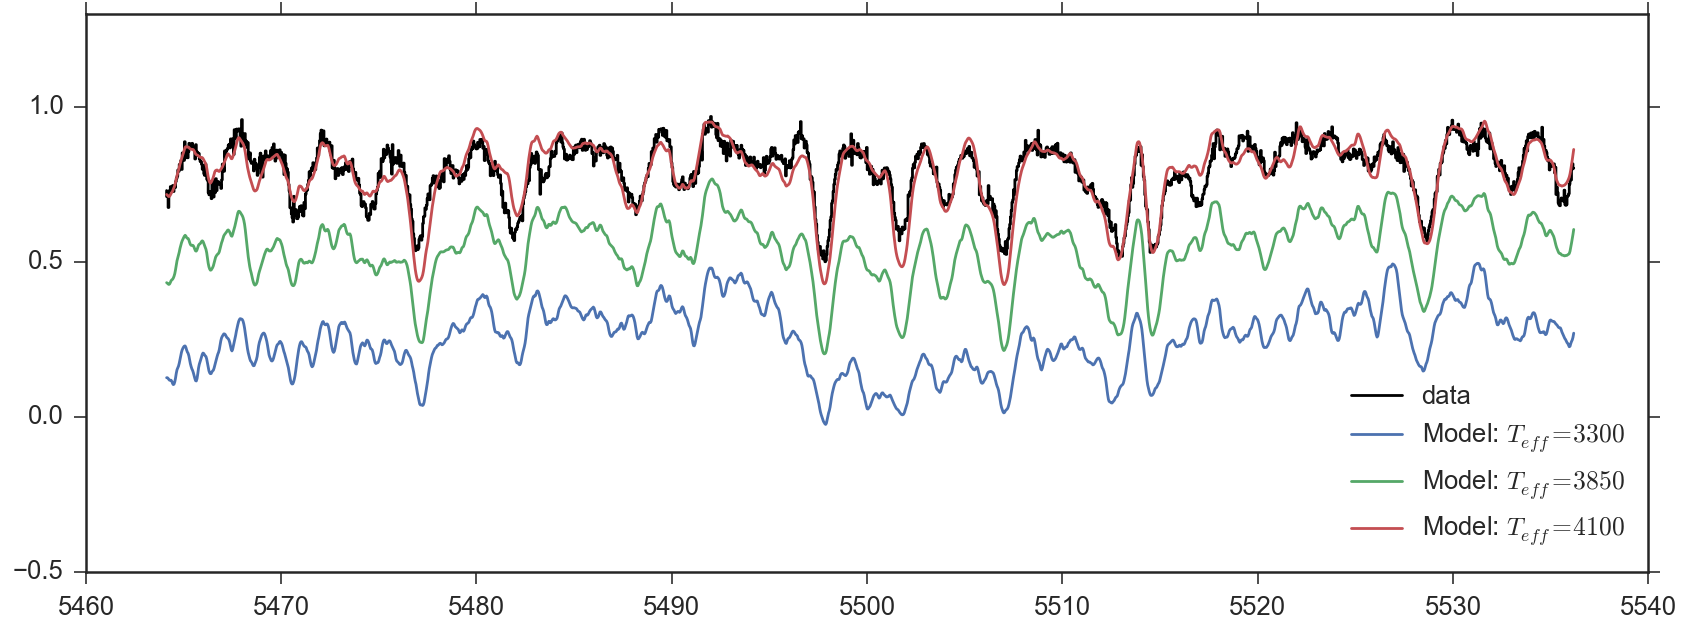

In [176]:
plt.figure(figsize=(14, 5))
y1, y2, y3 = (np.array(spec[0]['model'])-0.50, 
              np.array(spec[1]['model'])-0.25, 
              np.array(spec[2]['model'])+0.0)

#corr = (1.0 + x * 0.0)
m2 = (np.array(spec[2]['model'])*f + (1.0-f)*np.array(spec[0]['model']))

plt.step(spec[0]['wl'], spec[0]['data'], 'k', label='data')
plt.plot(spec[0]['wl'], y1, label='Model: $T_{eff} = 3300$')
plt.plot(spec[1]['wl'], y2, label='Model: $T_{eff} = 3850$')
plt.plot(spec[2]['wl'], y3, label='Model: $T_{eff} = 4100$')
#plt.plot(spec[2]['wl'], m2, label='Model: mix')

#plt.xlim(7855, 8055)
plt.ylim(-0.5, 1.3)
plt.legend(loc='best');

In [179]:
def plot_models(f):
    plt.figure(figsize=(14, 5))
    y1, y2, y3 = (np.array(spec[0]['model'])-0.50, 
                  np.array(spec[1]['model'])-0.25, 
                  np.array(spec[2]['model'])+0.0)

    #corr = (1.0 + x * 0.0)
    m2 = (np.array(spec[2]['model'])*f + (1.0-f)*np.array(spec[0]['model']))

    plt.step(spec[0]['wl'], spec[0]['data'], 'k', label='data')
    plt.plot(spec[0]['wl'], y1, label='Model: $T_{eff} = 3300$')
    plt.plot(spec[1]['wl'], y2, label='Model: $T_{eff} = 3850$')
    plt.plot(spec[2]['wl'], y3, label='Model: $T_{eff} = 4100$')
    plt.plot(spec[2]['wl'], m2, label='Model: mix')

    #plt.xlim(7855, 8055)
    plt.ylim(-0.5, 1.3)
    plt.legend(loc='best');

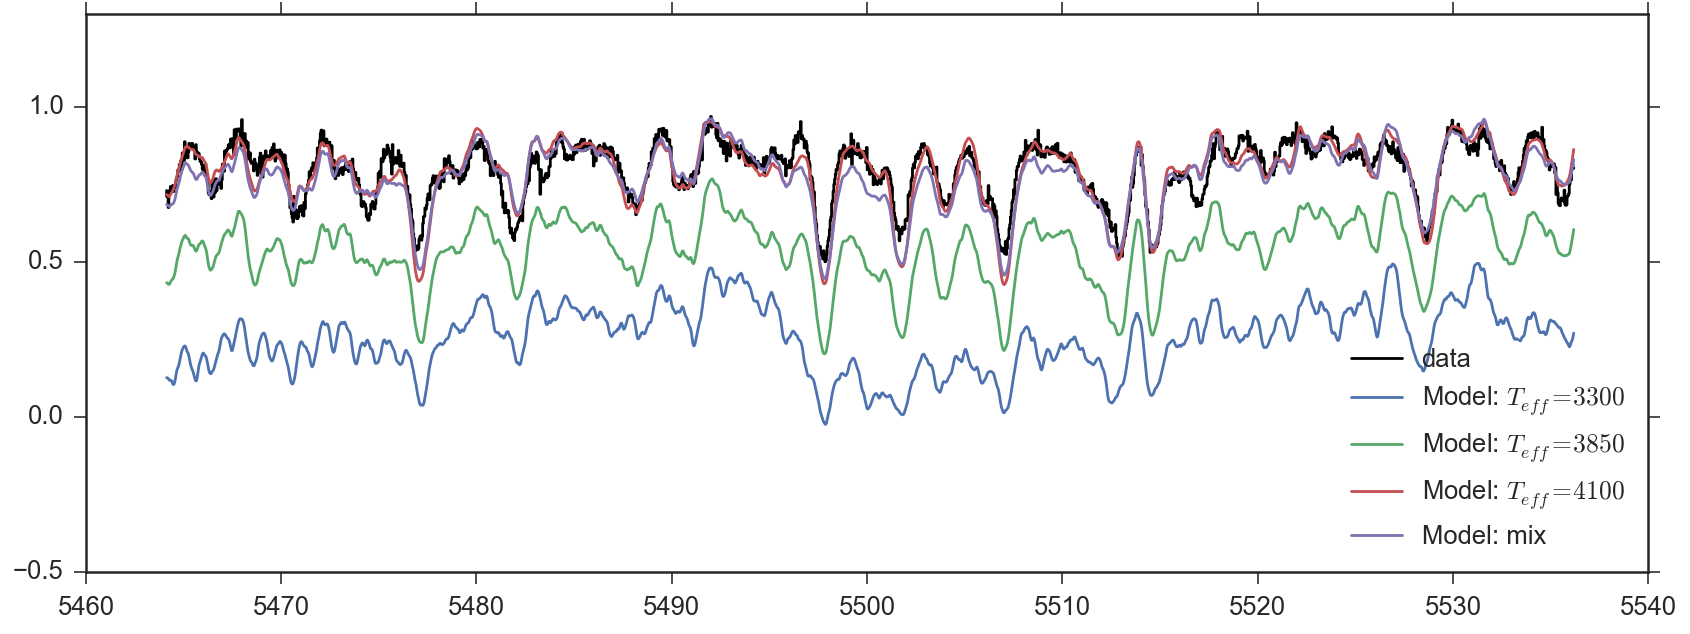

In [180]:
interact(plot_models, f=(0,1,0.05))

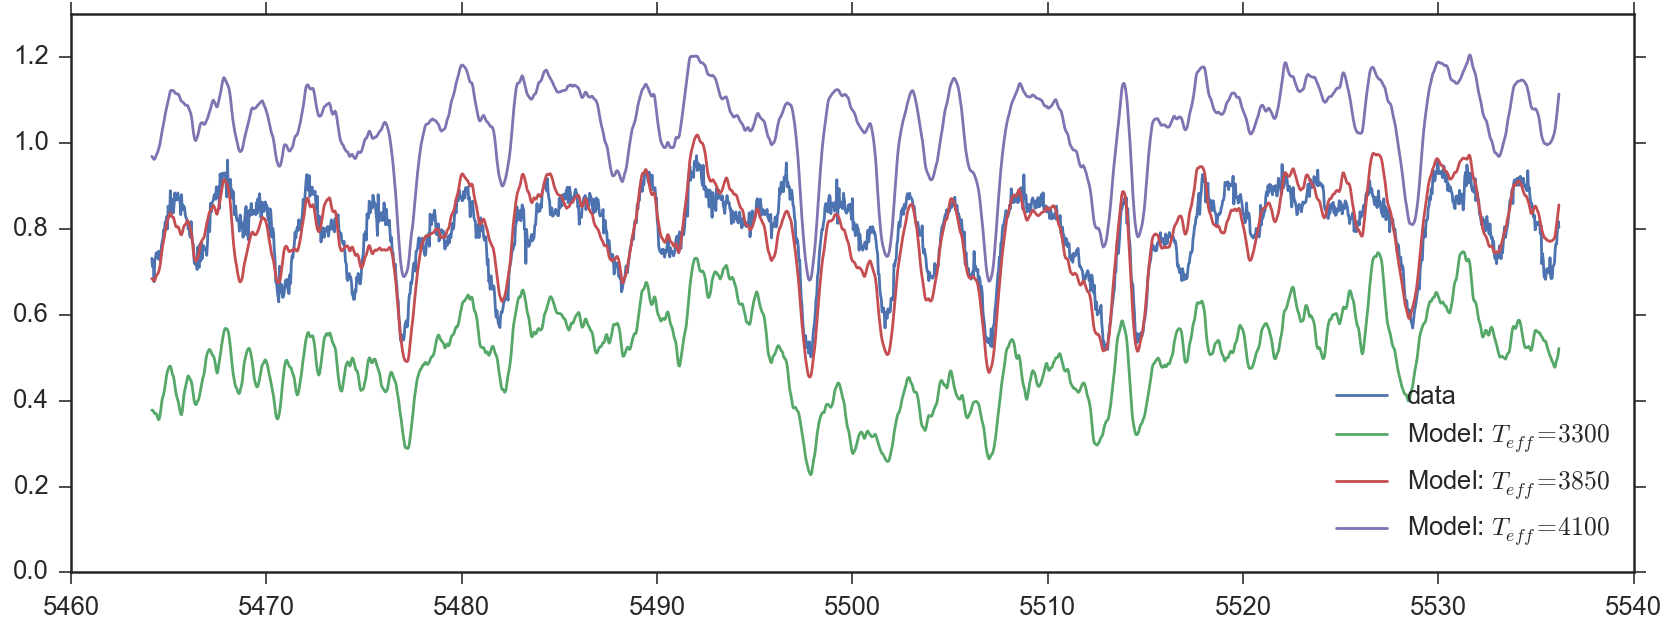

In [148]:

plt.figure(figsize=(14, 5))
y1, y2, y3 = (np.array(spec[0]['model'])-0.25, 
              np.array(spec[1]['model'])+0.0, 
              np.array(spec[2]['model'])+0.25)

plt.plot(spec[0]['wl'], spec[0]['data'], label='data')
plt.plot(spec[0]['wl'], y1, label='Model: $T_{eff} = 3300$')
plt.plot(spec[1]['wl'], y2, label='Model: $T_{eff} = 3850$')
plt.plot(spec[2]['wl'], y3, label='Model: $T_{eff} = 4100$')

#plt.xlim(7855, 8055)
plt.ylim(0, 1.3)
plt.legend(loc='best');

# Plot of "flux calibrated" spectrum!

In [7]:
import h5py
import numpy as np
from numpy.polynomial import Chebyshev as Ch

In [8]:
import yaml

In [9]:
import json

In [10]:
gi = sf_dat.Teff_50p == sf_dat.Teff_50p
ms = sf_dat.m_val[gi]

In [11]:
sf_out = '../sf/eo{:03d}/config.yaml'.format(20)

f = open(sf_out)
config = yaml.load(f)
f.close()

In [12]:
import os

In [13]:
cwd = os.getcwd()

# see note below!

Let's separate out the generating the model part from the plotting part.

## Edit all the config.yaml files with desired stellar model parameters

In [18]:
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_{}.hdf5'.format(mdir), 'r')
    log_Omega = sf_dat.get_value(index.values[0], 'logO_50p')
    
    len_wl = len(f['wls'])
    xs = np.arange(len_wl)
    
    wls = f['wls'][:]
    f.close()
    
    sf_out = '../sf/eo{:03d}/config.yaml'.format(m)

    f2 = open(sf_out)
    config = yaml.load(f2)
    f2.close()

    config['data']['files'] = ['/Users/gully/GitHub/welter/data/reduced/optical/LkCa4_ESPaDOnS_eo{:03d}.hdf5'.format(m)]
    config['grid']['hdf5_path'] = '/Users/gully/GitHub/welter/sf/eo{}/libraries/PHOENIX_IGRINS_eo{:03d}.hdf5'.format(m, m)
    lb, ub = int(np.floor(wls[0])), int(np.ceil(wls[-1]))

    config['grid']['wl_range'] = [lb, ub]
    config['PCA']['path'] = '/Users/gully/GitHub/welter/sf/eo{:03d}/PHOENIX_ESPaDOnS_H_PCA.hdf5'.format(m)
    config['name'] = 'LkCa4_eo{:03d}'.format(m)
    config['Comments'] = 'LkCa4 single order: o = {}, autogenerated config file.'.format(m)
    config['data']['instruments'] =['ESPaDOnS']
    config['Theta']['grid'] = [int(sf_dat.Teff_50p[index.values[0]]), 3.7, 0.0]
    config['Theta']['vsini'] = float(np.round(sf_dat.vi_50p[index.values[0]], decimals=1))
    config['Theta']['vz'] = float(np.round(sf_dat.vz_50p[index.values[0]], decimals=1))

    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls[0], wls[-1], mdir))

    #os.makedirs(path_out, exist_ok=True)
    with open(sf_out, mode='w') as outfile:
        outfile.write(yaml.dump(config))

000: 5161  -  5200   eo000
001: 5200  -  5263   eo001
002: 5263  -  5327   eo002
003: 5327  -  5395   eo003
004: 5395  -  5464   eo004
005: 5464  -  5536   eo005
006: 5536  -  5611   eo006
007: 5611  -  5689   eo007
008: 5689  -  5769   eo008
009: 5769  -  5853   eo009
010: 5853  -  5941   eo010
011: 5941  -  6031   eo011
012: 6032  -  6126   eo012
013: 6126  -  6225   eo013
014: 6225  -  6328   eo014
015: 6328  -  6436   eo015
016: 6436  -  6549   eo016
017: 6549  -  6667   eo017
018: 6667  -  6791   eo018
020: 6920  -  7057   eo020
021: 7057  -  7200   eo021
022: 7201  -  7352   eo022
023: 7352  -  7511   eo023
026: 7858  -  8051   eo026
029: 8474  -  8706   eo029
030: 8706  -  8954   eo030


## Edit the phi.json file with the default or measured calibration parameters

In [19]:
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)
    
    phi_out = '../sf/eo{:03d}/s0_o0phi.json'.format(m)

    jf = open(phi_out)
    phi = json.load(jf)
    jf.close()

    ii = index.values[0]
    
    c1, c2, c3 = sf_dat.c1_50p[ii], sf_dat.c2_50p[ii], sf_dat.c3_50p[ii]
    if c1 != c1:
        phi['cheb'] = [0.0,0,0]
        phi['logAmp']= -1.6
        phi['sigAmp']= 0.4
        phi['l']= 30.0
    if c1 == c1:
        phi['cheb'] = [c1, c2, c3]
        phi['logAmp']= sf_dat.LA_50p[ii]
        phi['sigAmp']= sf_dat.SA_50p[ii]
        phi['l']= sf_dat.ll_50p[ii]
    
    phi['fix_c0'] = True
    
    with open(phi_out, mode='w') as outfile:
        json.dump(phi, outfile, indent=2)

## Generate the model

Check to see if the right files exist.

In [21]:
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)    
    m_path = '/Users/gully/GitHub/welter/sf/{}/'.format(mdir)
    phi_out = '../sf/eo{:03d}/s0_o0phi.json'.format(m)
    sf_out = '../sf/eo{:03d}/config.yaml'.format(m)

    if os.path.exists(phi_out) & os.path.exists(sf_out):
        print('Both exist for {}'.format(mdir))
    else:
        print('At least one is missing for {}'.format(mdir))
    
    os.chdir(m_path)
    os.system('star.py --generate')
    os.chdir('/Users/gully/GitHub/welter/notebooks')

Both exist for eo000
Both exist for eo001
Both exist for eo002
Both exist for eo003
Both exist for eo004
Both exist for eo005
Both exist for eo006
Both exist for eo007
Both exist for eo008
Both exist for eo009
Both exist for eo010
Both exist for eo011
Both exist for eo012
Both exist for eo013
Both exist for eo014
Both exist for eo015
Both exist for eo016
Both exist for eo017
Both exist for eo018
Both exist for eo020
Both exist for eo021
Both exist for eo022
Both exist for eo023
Both exist for eo026
Both exist for eo029
Both exist for eo030


## Make a plot: Data

(0, 2)

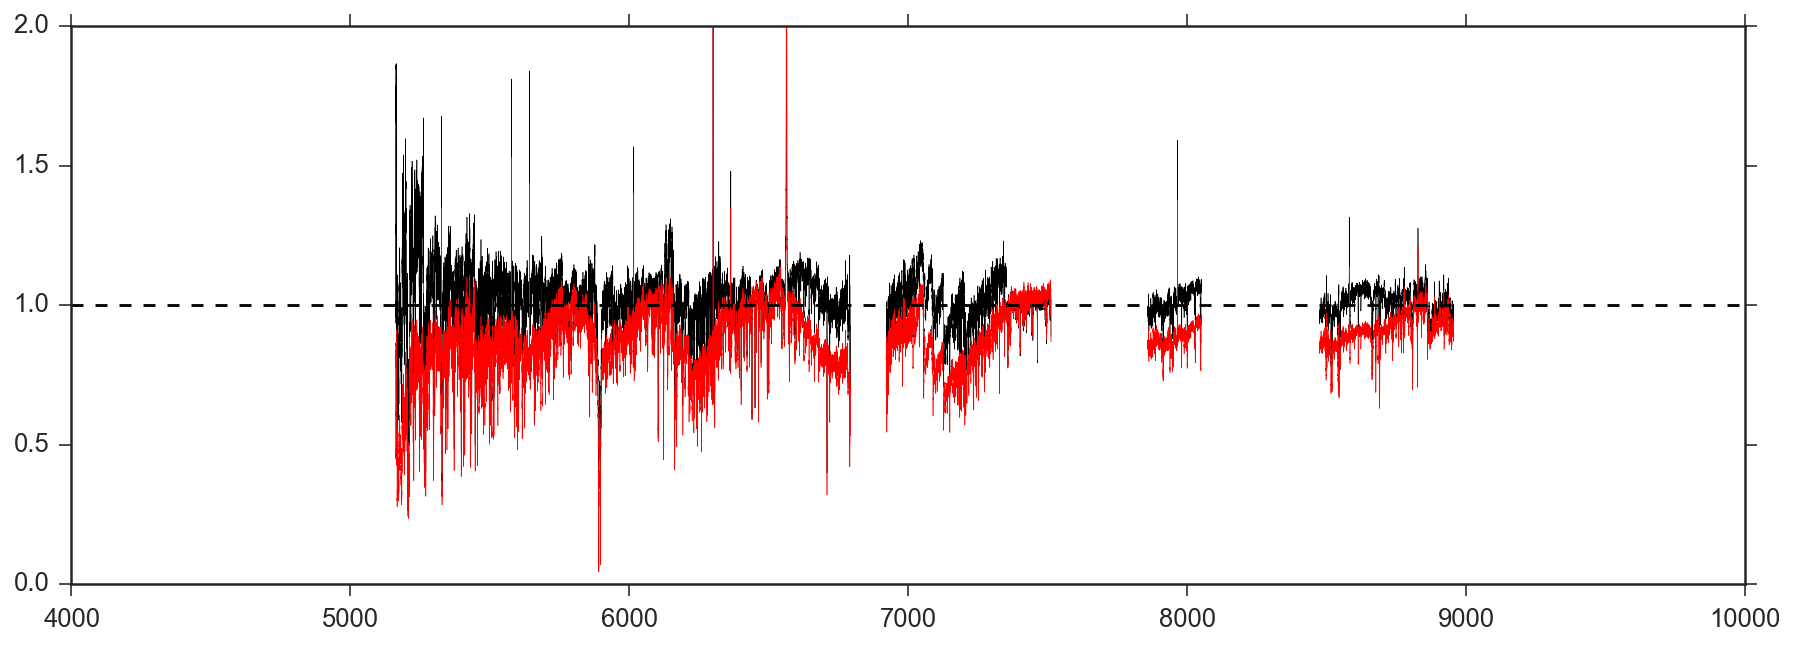

In [24]:
fig = plt.figure(figsize=(15, 5))
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_{}.hdf5'.format(mdir), 'r')
    log_Omega = sf_dat.get_value(index.values[0], 'logO_50p')
    #plt.plot(f['wls'], f['fls'], 'r.', alpha=0.05)
    #plt.plot(f['wls'], f['fls']/(10**log_Omega), 'k.', alpha=0.05)
    
    len_wl = len(f['wls'])
    xs = np.arange(len_wl)
    coeff = [1]
    T = []
    for i in range(1, 4):
        # print("i = ", i)
        coeff = [0] + coeff
        Chtemp = Ch(coeff, domain=[0, len_wl - 1])
        Ttemp = Chtemp(xs)
        T += [Ttemp]

    T = np.array(T)

    cns = [sf_dat.c1_50p[index.values[0]], 
          sf_dat.c2_50p[index.values[0]],
          sf_dat.c3_50p[index.values[0]]]

    Tc = np.dot(T.T, cns)

    k = 1.0+ Tc

    plt.step(f['wls'], f['fls']/(10**log_Omega)/k, 'k', linewidth=0.3, alpha=1)
    plt.step(f['wls'], f['fls'], 'r', linewidth=0.3, alpha=1)

plt.plot([4000, 10000], [1.0, 1.0], 'k--')    
plt.ylim(0, 2)
#plt.xlim(21000, 22000)
#plt.xlim(16300, 17300)

## Make a plot: Models

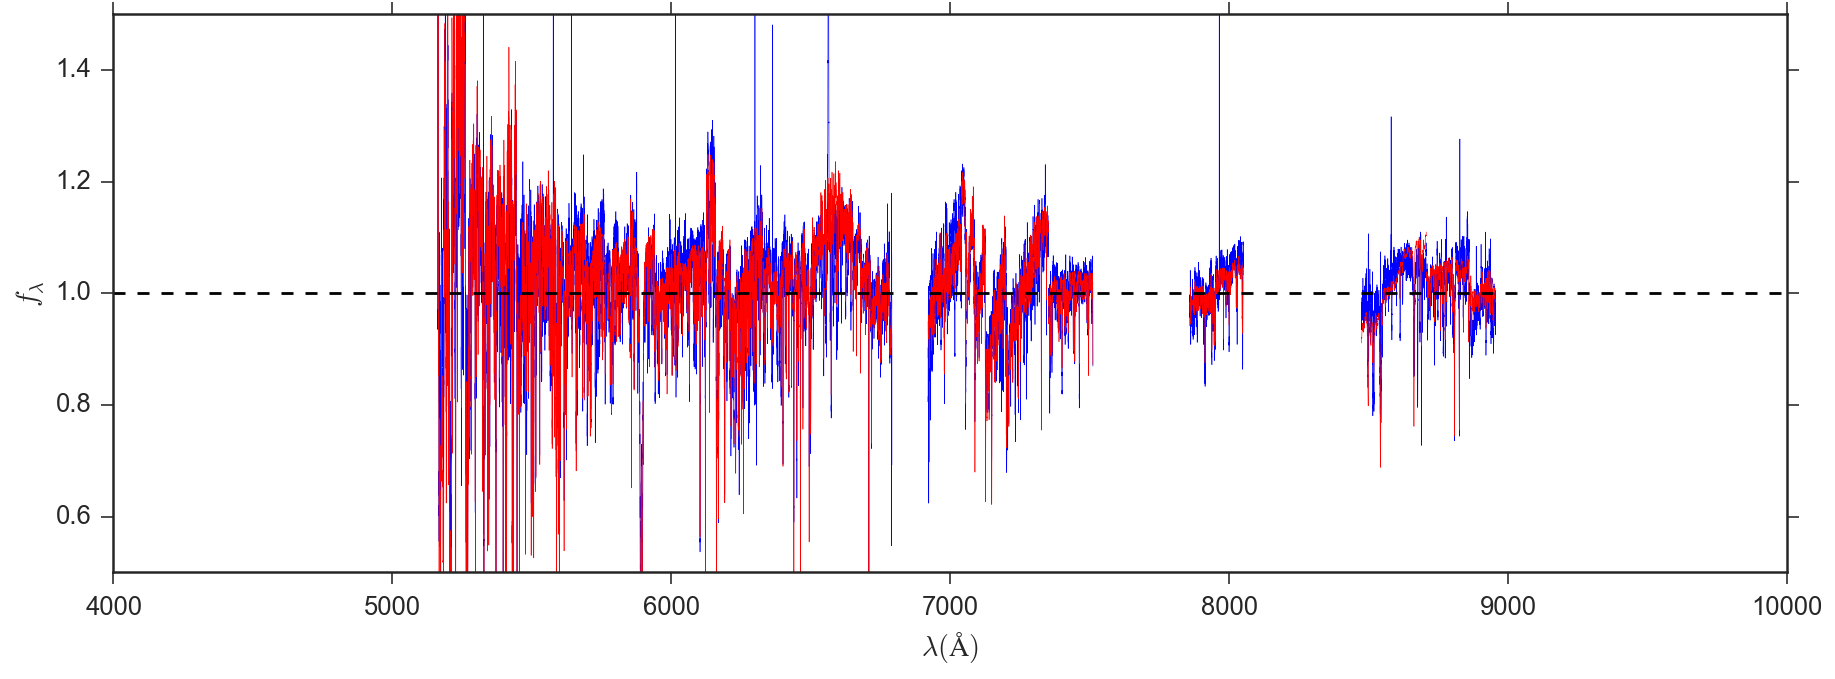

In [26]:
fig = plt.figure(figsize=(15, 5))
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)

    spec_file = open('../sf/{}/s0_o0spec.json'.format(mdir), 'r')
    spec = json.load(spec_file)
    
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_{}.hdf5'.format(mdir), 'r')
    log_Omega = sf_dat.get_value(index.values[0], 'logO_50p')
    #plt.plot(f['wls'], f['fls'], 'r.', alpha=0.05)
    #plt.plot(f['wls'], f['fls']/(10**log_Omega), 'k.', alpha=0.05)
    
    len_wl = len(f['wls'])
    xs = np.arange(len_wl)
    coeff = [1]
    T = []
    for i in range(1, 4):
        # print("i = ", i)
        coeff = [0] + coeff
        Chtemp = Ch(coeff, domain=[0, len_wl - 1])
        Ttemp = Chtemp(xs)
        T += [Ttemp]

    T = np.array(T)

    cns = [sf_dat.c1_50p[index.values[0]], 
          sf_dat.c2_50p[index.values[0]],
          sf_dat.c3_50p[index.values[0]]]

    Tc = np.dot(T.T, cns)

    k = 1.0+ Tc

    plt.step(f['wls'], f['fls']/(10**log_Omega)/k, 'b', linewidth=0.3, alpha=1)
    #plt.step(spec['wl'], spec['data']/(10**log_Omega)/k, 'k', linewidth=0.3, alpha=1)
    plt.step(spec['wl'], spec['model']/(10**log_Omega)/k, 'r', linewidth=0.3, alpha=1)
    spec_file.close()

plt.plot([4000, 10000], [1.0, 1.0], 'k--')    
plt.ylim(0.5, 1.5)
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('$f_\lambda$')
#plt.xlim(21000, 22000)
#plt.xlim(16300, 17300)
#plt.xlim(16200, 17800)

## Bokeh version of the above plot

In [27]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, vplot


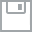
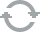
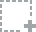
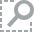
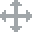
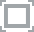
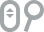
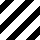
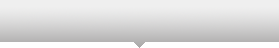
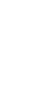
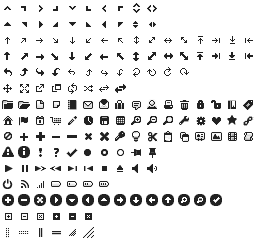
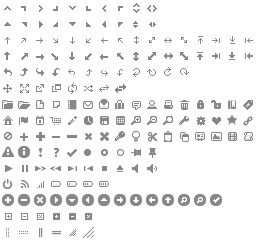
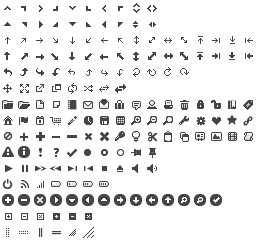
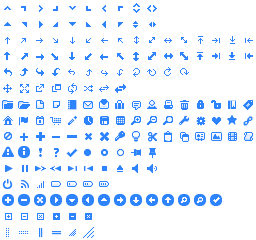
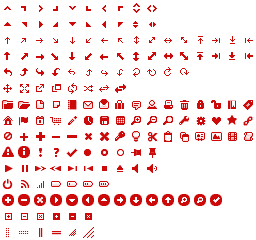
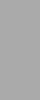
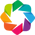
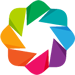

In [28]:
output_notebook()

In [29]:
import bokeh

In [30]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

In [31]:
r = figure(tools=TOOLS, plot_width=1000, plot_height=500)
r.title = "Stellar model"
r.grid.grid_line_alpha=0.3

for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'eo{:03d}'.format(m)

    spec_file = open('../sf/{}/s0_o0spec.json'.format(mdir), 'r')
    spec = json.load(spec_file)
    spec_file.close()
    
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_{}.hdf5'.format(mdir), 'r')
    log_Omega = sf_dat.get_value(index.values[0], 'logO_50p')
    #plt.plot(f['wls'], f['fls'], 'r.', alpha=0.05)
    #plt.plot(f['wls'], f['fls']/(10**log_Omega), 'k.', alpha=0.05)
    
    len_wl = len(f['wls'])
    xs = np.arange(len_wl)
    coeff = [1]
    T = []
    for i in range(1, 4):
        # print("i = ", i)
        coeff = [0] + coeff
        Chtemp = Ch(coeff, domain=[0, len_wl - 1])
        Ttemp = Chtemp(xs)
        T += [Ttemp]

    T = np.array(T)

    cns = [sf_dat.c1_50p[index.values[0]], 
          sf_dat.c2_50p[index.values[0]],
          sf_dat.c3_50p[index.values[0]]]

    Tc = np.dot(T.T, cns)

    k = 1.0+ Tc

    r.line(spec['wl'], spec['data']/(10**log_Omega)/k, color='#1F78B4', legend='data')
    r.line(spec['wl'], spec['model']/(10**log_Omega)/k, color='#FB9A99', legend='model')
    
    #r.line(spec['wl'], spec['data'], color='#1F78B4', legend='data')
    #r.line(spec['wl'], spec['model'], color='#FB9A99', legend='data')

    
r.y_range = bokeh.models.Range1d(start=0.5, end=1.5)
r.xaxis.axis_label = "λ (Å)"
r.yaxis.axis_label = "f"


In [32]:
show(r)